In [2]:
import os
import json

In [3]:


def analyze_json_files(folder_path):
    """
    
    """


    each_catogory = {}
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            file_name_list = filename.split("_")
            # if file is part of //link// then go to next file. 
            if "link" in file_name_list:
                continue

            with open(file_path, 'r', encoding='utf-8') as file:
                try:
                    each_body = {
                                "Audio_Count": "",
                                "Text_Count": "",
                                "Title_Count": "",
                                "Total_Article": "",
                                "Total_Error": ""

                            }
                    articles_with_audio = 0
                    articles_with_text = 0
                    articles_with_title = 0
                    total_error = 0

                    data = json.load(file)

                    each_body["Total_Article"] = len(data)
                    # checking each audio in the content.
                    for each_key in data:
                        if data.get(each_key)['Response'] == 200:
                            text_data = data.get(each_key)['data']['body']['Text']
                            audio_data = data.get(each_key)['data']['body']['Audio']
                            title_data = data.get(each_key)['data']['title']

                            if audio_data != "No Audio in Bangchen":
                                articles_with_audio += 1
                            # checking each body in the content.
                            if text_data != "No Content in the article":
                                articles_with_text += 1
                            # checking each title in the content.
                            if title_data != "Title not found":
                                articles_with_title += 1
                        else:
                            total_error += 1

                    each_body['Audio_Count'] = articles_with_audio
                    each_body['Text_Count'] = articles_with_text
                    each_body['Title_Count'] = articles_with_title
                    each_body['Total_Error'] = total_error
                    
                    each_catogory[filename] = each_body

                except json.JSONDecodeError:
                    print(f"Error decoding JSON in file: {filename}")
                except KeyError:
                    print(f"Unexpected structure in file: {filename}")

    # Print the analysis results
    return each_catogory





In [4]:
# Usage
folder_path = './data/'  # Replace with the actual path to your data folder
Analysis = analyze_json_files(folder_path)
Analysis

{'Bangchen_ALL_content_ཆེད་བརྗོད།.json': {'Audio_Count': 0,
  'Text_Count': 726,
  'Title_Count': 726,
  'Total_Article': 728,
  'Total_Error': 2},
 'Bangchen_ALL_content_དཔེ་དེབ་ངོ་སྤྲོད།.json': {'Audio_Count': 0,
  'Text_Count': 29,
  'Title_Count': 29,
  'Total_Article': 29,
  'Total_Error': 0},
 'Bangchen_ALL_content_ནང་ཆོས་ངོ་སྤྲོད།.json': {'Audio_Count': 0,
  'Text_Count': 48,
  'Title_Count': 48,
  'Total_Article': 48,
  'Total_Error': 0},
 'Bangchen_ALL_content_བཅར་འདྲི།.json': {'Audio_Count': 0,
  'Text_Count': 230,
  'Title_Count': 230,
  'Total_Article': 230,
  'Total_Error': 0},
 'Bangchen_ALL_content_བཙན་བྱོལ།.json': {'Audio_Count': 0,
  'Text_Count': 5415,
  'Title_Count': 5415,
  'Total_Article': 5418,
  'Total_Error': 3},
 'Bangchen_ALL_content_བོད་ཀྱི་ལོ་རྒྱུས།.json': {'Audio_Count': 0,
  'Text_Count': 38,
  'Title_Count': 38,
  'Total_Article': 38,
  'Total_Error': 0},
 'Bangchen_ALL_content_བོད་ཀྱི་སྐད་ཡིག.json': {'Audio_Count': 0,
  'Text_Count': 0,
  'Title_Count':

In [5]:
def save_json(path, file_name, data):
    """
    
    """
    with open(path+file_name, "w") as outfile:
        json.dump(data, outfile, indent=4)
        print(f"Successfully saved: {file_name}")

In [6]:
save_file_name = f"Bangchoe_Analysis.json"
path = "./data/"
save_json(path, save_file_name, Analysis)

Successfully saved: Bangchoe_Analysis.json


C:\Users\tashi\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Chart saved as Bangchoe_Analysis.png


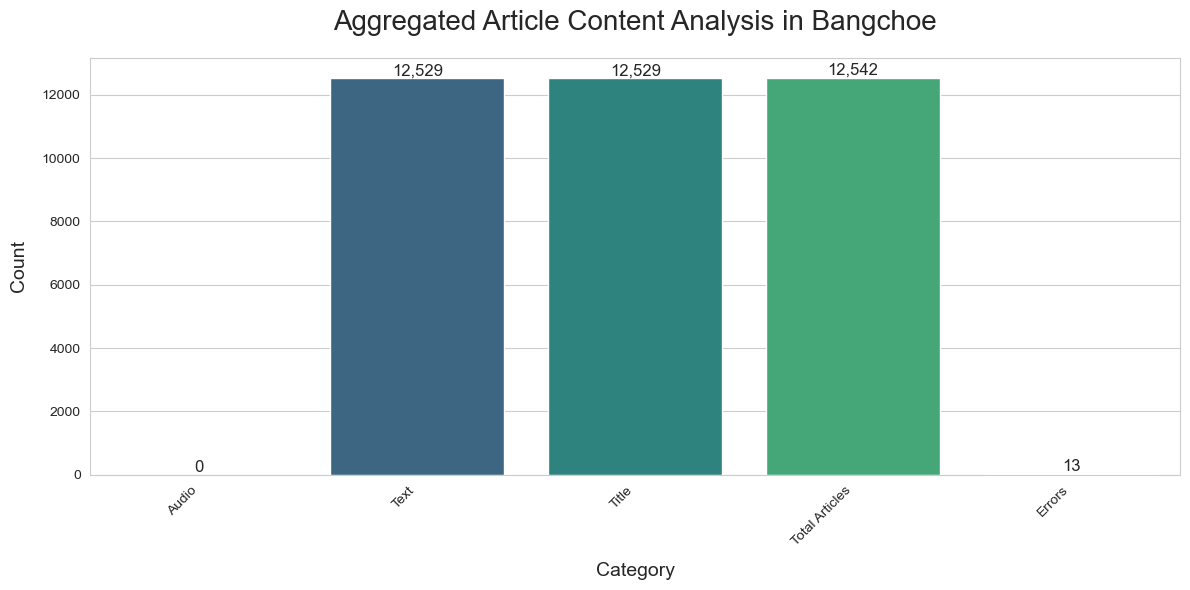

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = Analysis

# Sum up the counts
total_counts = {
    "Audio": sum(file_data["Audio_Count"] for file_data in data.values()),
    "Text": sum(file_data["Text_Count"] for file_data in data.values()),
    "Title": sum(file_data["Title_Count"] for file_data in data.values()),
    "Total Articles": sum(file_data["Total_Article"] for file_data in data.values()),
    "Errors": sum(file_data["Total_Error"] for file_data in data.values())
}

# Create a DataFrame
df = pd.DataFrame(list(total_counts.items()), columns=['Category', 'Count'])

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x='Category', y='Count', data=df, palette='viridis')

# Customize the plot
plt.title('Aggregated Article Content Analysis in Bangchoe', fontsize=20, pad=20)
plt.xlabel('Category', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)

# Add value labels on top of each bar
for i, v in enumerate(df['Count']):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()


file_name = "Bangchoe_Analysis.png"
# Save the plot in the data directory
plt.savefig(path+file_name,)
print(f"Chart saved as {file_name}")

plt.show()
